<a href="https://colab.research.google.com/github/vaibhavhirani/ML-Loan-Assignment/blob/main/ML_assignment_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Start

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys
os.listdir('/content/drive/MyDrive/Loan Dataset/')

['LoanStats_securev1_2017Q1.csv',
 'LoanStats_securev1_2017Q2.csv',
 'LoanStats_securev1_2017Q3.csv',
 'LoanStats3c_securev1_2014.csv',
 'LoanStats3d_securev1_2015.csv']

In [3]:
from __future__ import print_function

import pandas as pd
import numpy as np

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
pd.__version__

'1.1.5'

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [39]:
loan_20171 = pd.read_csv('./drive/MyDrive/Loan Dataset/LoanStats_securev1_2017Q1.csv',skiprows=1, low_memory=False)
loan_20172 = pd.read_csv('./drive/MyDrive/Loan Dataset/LoanStats_securev1_2017Q2.csv',skiprows=1, low_memory=False)
loan_20173 = pd.read_csv('./drive/MyDrive/Loan Dataset/LoanStats_securev1_2017Q3.csv',skiprows=1, low_memory=False)
loan_2015 = pd.read_csv('./drive/MyDrive/Loan Dataset/LoanStats3d_securev1_2015.csv',skiprows=1, low_memory=False)
loan_2014 = pd.read_csv('./drive/MyDrive/Loan Dataset/LoanStats3c_securev1_2014.csv',skiprows=1, low_memory=False)

# loan_2014 = pd.read_csv('/content/drive/MyDrive/ML_Loan/filtered_LoanStats3c_securev1_2014.csv')
# loan_2015 = pd.read_csv('/content/drive/MyDrive/ML_Loan/filtered_LoanStats3d_securev1_2015.csv')
# loan_20171 = pd.read_csv('/content/drive/MyDrive/ML_Loan/filtered_LoanStats_securev1_2017Q1.csv')
# loan_20172 = pd.read_csv('/content/drive/MyDrive/ML_Loan/filtered_LoanStats_securev1_2017Q2.csv')
# loan_20173 = pd.read_csv('/content/drive/MyDrive/ML_Loan/filtered_LoanStats_securev1_2017Q3.csv')

loan_data = pd.concat([loan_2014, loan_2015, loan_20171, loan_20172, loan_20173])

In [41]:
#concat all the sets
loan_data.shape

(981665, 151)

# Cleaning the data: deleting Columns

In [40]:
cut_off = len(loan_data) / 2
data = loan_data.dropna(thresh=cut_off, axis=1)
data = data.drop(['url'], axis=1)
data.head(3)
data.shape

(981665, 94)

In [42]:
data_dtypes = pd.DataFrame(data.dtypes, columns=['dtypes'])
data_dtypes = data_dtypes.reset_index() 
data_dtypes['name'] = data_dtypes['index']
data_dtypes = data_dtypes[['name', 'dtypes']]
data_dtypes['first value'] = data.loc[0].values
data_dtypes.head(3)

ValueError: ignored

In [43]:
# data['loan_status'].nunique()
drop_list = ['id', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'emp_title', 'issue_d', 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'disbursement_method' ]
data = data.drop(drop_list, axis=1)
data.head(3)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,15000.0,60 months,336.64,C,10+ years,RENT,78000.0,Source Verified,Fully Paid,n,debt_consolidation,Debt consolidation,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,6.0,0.0,138008.0,29%,17.0,w,Nov-2017,684.0,680.0,0.0,1.0,Individual,0.0,0.0,149140.0,184500.0,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,0.0,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,N
1,10400.0,36 months,321.08,A,8 years,MORTGAGE,58000.0,Not Verified,Charged Off,n,credit_card,Credit card refinancing,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,17.0,0.0,6133.0,31.6%,36.0,w,Feb-2017,564.0,560.0,0.0,1.0,Individual,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,N
2,21425.0,60 months,516.36,D,6 years,RENT,63800.0,Source Verified,Fully Paid,n,credit_card,Credit card refinancing,MO,18.49,0.0,Aug-2003,685.0,689.0,0.0,60.0,10.0,0.0,16374.0,76.2%,35.0,w,Dec-2017,704.0,700.0,0.0,1.0,Individual,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,0.0,7.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,N


[750. 710. 685. 665. 680. 700. 745. 675. 690. 660. 670. 730. 705. 715.
 775. 695. 755. 740. 725. 790. 765. 720. 735. 785. 770. 800. 795. 760.
 830. 820. 780. 805. 825. 810. 815. 835. 845. 840.  nan]
[754. 714. 689. 669. 684. 704. 749. 679. 694. 664. 674. 734. 709. 719.
 779. 699. 759. 744. 729. 794. 769. 724. 739. 789. 774. 804. 799. 764.
 834. 824. 784. 809. 829. 814. 819. 839. 850. 844.  nan]
981665
981655


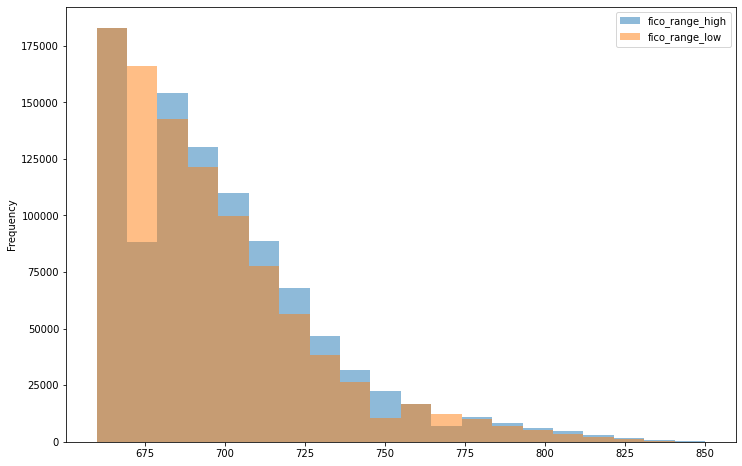

In [44]:
print(data['fico_range_low'].unique())
print(data['fico_range_high'].unique())

fico_columns = ['fico_range_high','fico_range_low']
print(data.shape[0])
data.dropna(subset=fico_columns,inplace=True)
print(data.shape[0])
data[fico_columns].plot.hist(alpha=0.5,bins=20);

In [45]:
data['fico_average'] = (data['fico_range_high'] + data['fico_range_low'] ) / 2

In [46]:
data[['fico_range_low','fico_range_high','fico_average']].head()

,fico_range_low,fico_range_high,fico_average
0,750.0,754.0,752.0
1,710.0,714.0,712.0
2,685.0,689.0,687.0
3,665.0,669.0,667.0
4,685.0,689.0,687.0


In [47]:
data = data.drop(['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high'], axis=1)
data.shape

(981655, 66)

In [48]:
data_dtypes[data_dtypes.name == 'loan_status']
data['loan_status'].value_counts()

Current               500937
Fully Paid            358629
Charged Off            99099
Late (31-120 days)     13203
In Grace Period         6337
Late (16-30 days)       3414
Default                   36
Name: loan_status, dtype: int64

In [49]:
# meaning = [
# "Loan is up to date on current payments.",
# "Loan has been fully paid off.",
# "Loan for which there is no longer a reasonable expectation of further payments.",
# "Loan hasn't been paid in 31 to 120 days (late on the current payment).",
# "The loan is past due but still in the grace period of 15 days.",
# "Loan hasn't been paid in 16 to 30 days (late on the current payment).",
# "Loan is defaulted on and no payment has been made for more than 121 days."]

status, count = data["loan_status"].value_counts().index, data["loan_status"].value_counts().values
# loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count})[['Loan Status','Count']]
loan_statuses_explanation

,Loan Status,Count
0,Current,500937
1,Fully Paid,358629
2,Charged Off,99099
3,Late (31-120 days),13203
4,In Grace Period,6337
5,Late (16-30 days),3414
6,Default,36


Remember, our goal is to build a machine learning model that can learn from past loans in trying to predict which loans will be paid off and which won’t. From the above table, only the Fully Paid and Charged Off values describe the final outcome of a loan. The other values describe loans that are still ongoing, and even though some loans are late on payments, we can’t jump the gun and classify them as Charged Off.

Also, while the Default status resembles the Charged Off status, in LendingClub’s eyes, loans that are charged off have essentially no chance of being repaid, while defaulted loans have a small chance. Therefore, we should use only samples where the loan_status column is 'Fully Paid' or 'Charged Off'.

In [50]:
data = data[(data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Charged Off') ]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
data = data.replace(mapping_dictionary)

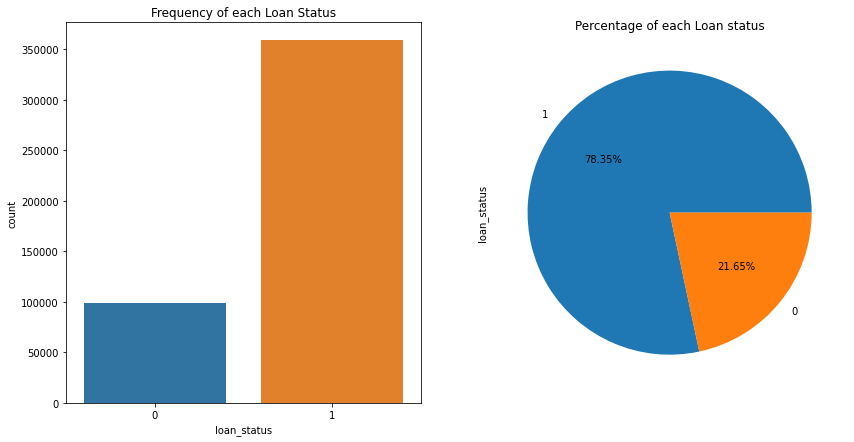

In [51]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=data ,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
data.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [52]:
data = data.loc[:,data.apply(pd.Series.nunique) != 1]

In [53]:
for col in data.columns:
    if (len(data[col].unique()) < 4):
      print(data[col].value_counts())
      print()

 36 months    341042
 60 months    116686
Name: term, dtype: int64

Source Verified    187996
Not Verified       135931
Verified           133801
Name: verification_status, dtype: int64

1    358629
0     99099
Name: loan_status, dtype: int64

w    259204
f    198524
Name: initial_list_status, dtype: int64

Individual    456197
Joint App       1531
Name: application_type, dtype: int64

N    449510
Y      8218
Name: debt_settlement_flag, dtype: int64



In [54]:
print("We've been able to reduce the features to => {}".format(data.shape[1]))

We've been able to reduce the features to => 63


In [ ]:
# data.to_csv("/content/drive/MyDrive/ML_Loan/filtered_loan_2017Q1.csv", index=False)

# Preparing the feature

In [55]:
filtered_loans = data
filtered_loans.shape

(457728, 63)



```
Handle Missing Values
Investigate Categorical Columns
  Convert Categorical Columns To Numeric Features
    Map Ordinal Values To Integers
    Encode Nominal Values As Dummy Variables
```



In [56]:
null_counts = filtered_loans.isnull().sum()
null_counts.sort_values(ascending=False)[:25]

mths_since_last_delinq        223121
mths_since_recent_inq          40177
emp_length                     24885
mo_sin_old_il_acct             13020
bc_util                         5093
percent_bc_gt_75                5036
bc_open_to_buy                  4772
revol_util                       223
title                             62
last_credit_pull_d                26
dti                               21
avg_cur_bal                        6
num_rev_accts                      1
collections_12_mths_ex_med         0
initial_list_status                0
open_acc                           0
total_acc                          0
revol_bal                          0
application_type                   0
pub_rec                            0
earliest_cr_line                   0
inq_last_6mths                     0
tot_coll_amt                       0
delinq_2yrs                        0
addr_state                         0
dtype: int64

In [57]:
filtered_loans = filtered_loans.drop(['mths_since_last_delinq', 'il_util', 'mths_since_recent_inq', 'emp_length', 'mths_since_rcnt_il', 'mo_sin_old_il_acct', 'bc_open_to_buy', 'percent_bc_gt_75', 'bc_util'],axis=1, errors='ignore')
filtered_loans = filtered_loans.dropna()

In [58]:
null_counts = filtered_loans.isnull().sum()
print(null_counts.sort_values(ascending=False)[:25])
filtered_loans.shape
filtered_loans.head()

fico_average                  0
debt_settlement_flag          0
tot_coll_amt                  0
acc_now_delinq                0
application_type              0
collections_12_mths_ex_med    0
last_credit_pull_d            0
initial_list_status           0
total_acc                     0
revol_util                    0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
earliest_cr_line              0
delinq_2yrs                   0
dti                           0
addr_state                    0
title                         0
purpose                       0
loan_status                   0
verification_status           0
annual_inc                    0
home_ownership                0
grade                         0
dtype: int64


,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,fico_average
0,15000.0,60 months,336.64,C,RENT,78000.0,Source Verified,1,debt_consolidation,Debt consolidation,VA,12.03,0.0,Aug-1994,0.0,6.0,0.0,138008.0,29%,17.0,w,Nov-2017,0.0,Individual,0.0,0.0,149140.0,184500.0,5.0,29828.0,0.0,0.0,244.0,1.0,0.0,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,4.0,100.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,752.0
1,10400.0,36 months,321.08,A,MORTGAGE,58000.0,Not Verified,0,credit_card,Credit card refinancing,CA,14.92,0.0,Sep-1989,2.0,17.0,0.0,6133.0,31.6%,36.0,w,Feb-2017,0.0,Individual,0.0,0.0,162110.0,19400.0,7.0,9536.0,0.0,0.0,290.0,1.0,1.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,4.0,83.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,712.0
2,21425.0,60 months,516.36,D,RENT,63800.0,Source Verified,1,credit_card,Credit card refinancing,MO,18.49,0.0,Aug-2003,0.0,10.0,0.0,16374.0,76.2%,35.0,w,Dec-2017,0.0,Individual,0.0,0.0,42315.0,21500.0,4.0,4232.0,0.0,0.0,136.0,7.0,0.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,2.0,91.4,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,687.0
4,7650.0,36 months,260.20,C,RENT,50000.0,Source Verified,0,debt_consolidation,Debt consolidation,AZ,34.81,0.0,Aug-2002,1.0,11.0,0.0,16822.0,91.9%,20.0,f,Oct-2016,0.0,Individual,0.0,0.0,64426.0,18300.0,6.0,5857.0,0.0,0.0,148.0,8.0,0.0,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,2.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,N,687.0
5,9600.0,36 months,326.53,C,RENT,69000.0,Source Verified,1,debt_consolidation,Debt consolidation,NJ,25.81,0.0,Nov-1992,0.0,12.0,0.0,16388.0,59.4%,44.0,f,Dec-2017,0.0,Individual,0.0,0.0,38566.0,27600.0,8.0,3214.0,0.0,0.0,265.0,23.0,0.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,3.0,100.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,N,682.0


Handling categorial Columns



In [67]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
float64    43
uint8      30
int64       2
dtype: int64


In [60]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                             60 months
grade                                    C
home_ownership                        RENT
verification_status        Source Verified
purpose                 debt_consolidation
title                   Debt consolidation
addr_state                              VA
earliest_cr_line                  Aug-1994
revol_util                             29%
initial_list_status                      w
last_credit_pull_d                Nov-2017
application_type                Individual
debt_settlement_flag                     N
Name: 0, dtype: object


In [61]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')

In [62]:
cols = ['home_ownership', 'grade','verification_status', 'term', 'addr_state', 'initial_list_status']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
MORTGAGE    228292
RENT        181196
OWN          47831
ANY             75
NONE             1
Name: home_ownership, dtype: int64 

grade :
C    129878
B    122999
A     75522
D     74251
E     38808
F     12494
G      3443
Name: grade, dtype: int64 

verification_status :
Source Verified    187879
Not Verified       135829
Verified           133687
Name: verification_status, dtype: int64 

term :
 36 months    340787
 60 months    116608
Name: term, dtype: int64 

addr_state :
CA    67158
TX    37374
NY    36622
FL    31717
IL    17470
NJ    16246
PA    15848
OH    14970
GA    14676
VA    13195
NC    12867
MI    12177
AZ    11144
MD    10683
CO    10550
MA    10180
WA    10147
MN     8386
IN     7952
TN     7400
MO     7167
NV     6876
CT     6242
WI     6007
AL     5815
OR     5801
SC     5355
LA     5329
KY     4420
OK     4120
KS     3773
UT     3597
AR     3406
NM     2667
MS     2382
HI     2331
NH     2139
RI     1982
WV     1974
MT     1318
DE     1290
DC     1

In [63]:
for name in ['purpose','title']:
  print("Unique Values in column: {}\n".format(name))
  print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    276426
credit_card           102324
home_improvement       27584
other                  22064
major_purchase          8245
medical                 4774
small_business          4204
car                     3958
moving                  2950
vacation                2751
house                   1835
renewable_energy         268
wedding                   11
educational                1
Name: purpose, dtype: int64 

Unique Values in column: title

Debt consolidation                        274242
Credit card refinancing                   101258
Home improvement                           27415
Other                                      21925
Major purchase                              8200
                                           ...  
Consolidating ALL of my debt!                  1
Loans                                          1
Personal & Business Loan Consolidation         1
Debt and home improvement                      1
Medical 

In [64]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1, errors='ignore')
filtered_loans.shape

(457395, 52)

Converting Categorical values



```
Ordinal
grade                              A

Nominal
initial_list_status                w
debt_settlement_flag               N
application_type          Individual
verification_status     Not Verified
term                       36 months
purpose                        other
home_ownership              MORTGAGE
```




In [65]:
mapping_dict = {
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7,
    }
}
filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['grade']].head()

,grade
0,3
1,1
2,4
4,3
5,3


In [66]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term", "initial_list_status", 'application_type', 'debt_settlement_flag']
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1)
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)
filtered_loans.head()

,loan_amnt,installment,grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,15000.0,336.64,3,78000.0,1,12.03,0.0,0.0,6.0,0.0,138008.0,29.0,17.0,0.0,0.0,0.0,149140.0,184500.0,5.0,29828.0,0.0,0.0,244.0,1.0,0.0,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,4.0,100.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,752.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
1,10400.0,321.08,1,58000.0,0,14.92,0.0,2.0,17.0,0.0,6133.0,31.6,36.0,0.0,0.0,0.0,162110.0,19400.0,7.0,9536.0,0.0,0.0,290.0,1.0,1.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,4.0,83.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,712.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
2,21425.0,516.36,4,63800.0,1,18.49,0.0,0.0,10.0,0.0,16374.0,76.2,35.0,0.0,0.0,0.0,42315.0,21500.0,4.0,4232.0,0.0,0.0,136.0,7.0,0.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,2.0,91.4,0.0,0.0,57073.0,42315.0,15000.0,35573.0,687.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
4,7650.0,260.20,3,50000.0,0,34.81,0.0,1.0,11.0,0.0,16822.0,91.9,20.0,0.0,0.0,0.0,64426.0,18300.0,6.0,5857.0,0.0,0.0,148.0,8.0,0.0,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,2.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,687.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
5,9600.0,326.53,3,69000.0,1,25.81,0.0,0.0,12.0,0.0,16388.0,59.4,44.0,0.0,0.0,0.0,38566.0,27600.0,8.0,3214.0,0.0,0.0,265.0,23.0,0.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,3.0,100.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,682.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [70]:
print(filtered_loans.shape)
np.isnan(filtered_loans).sum().sort_values(ascending=False)[:25]

(457395, 75)


debt_settlement_flag_Y      0
acc_open_past_24mths        0
chargeoff_within_12_mths    0
delinq_amnt                 0
mo_sin_old_rev_tl_op        0
mo_sin_rcnt_rev_tl_op       0
mort_acc                    0
num_accts_ever_120_pd       0
num_actv_bc_tl              0
num_actv_rev_tl             0
num_bc_sats                 0
num_bc_tl                   0
num_il_tl                   0
num_op_rev_tl               0
num_rev_accts               0
num_rev_tl_bal_gt_0         0
num_sats                    0
avg_cur_bal                 0
total_rev_hi_lim            0
num_tl_op_past_12m          0
tot_cur_bal                 0
installment                 0
grade                       0
annual_inc                  0
loan_status                 0
dtype: int64

In [69]:
filtered_loans.to_csv("/content/drive/MyDrive/ML_Loan/Ficoed/filtered_LoanStats.csv", index=False)

# Start - For Base Line

In [ ]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Classifiers <br>
Decision Tree -> from sklearn.tree import DecisionTreeClassifier



<br>
Calculating Accuracy<br>
Split the dataset into training and testing set
70-80% fro 

In [ ]:
#0, 118, 145, 146, 147
loan_data_2017q1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,Project Leader,10+ years,MORTGAGE,82000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,672xx,KS,31.07,0.0,May-1996,725.0,729.0,0.0,NaN,NaN,18.0,0.0,69578.0,63.2%,31.0,w,11438.26,11438.26,...,286204.0,104008.0,81400.0,60167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,MORTGAGE,215000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,067xx,CT,6.06,0.0,Jan-2004,765.0,769.0,4.0,NaN,NaN,11.0,0.0,8678.0,18.8%,16.0,f,4190.59,4190.59,...,100763.0,44754.0,46200.0,49814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,104028593,NaN,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,cable technician,4 years,RENT,44470.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,066xx,CT,13.43,0.0,Dec-2003,770.0,774.0,1.0,NaN,NaN,7.0,0.0,5400.0,19.1%,11.0,w,3708.50,3708.50,...,40000.0,9625.0,14500.0,11700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,104046702,NaN,14000.0,14000.0,14000.0,60 months,12.74%,316.69,C,C1,Specialty Sales,4 years,OWN,40000.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,926xx,CA,17.48,0.0,Feb-1974,715.0,719.0,0.0,NaN,NaN,10.0,0.0,25787.0,46.2%,23.0,w,12604.51,12604.51,...,55800.0,25787.0,52500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,104280113,NaN,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,Executive Account Manager,10+ years,MORTGAGE,182000.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,751xx,TX,9.35,0.0,Nov-1974,740.0,744.0,0.0,NaN,NaN,13.0,0.0,34623.0,33.7%,32.0,w,11869.91,11869.91,...,325464.0,50766.0,74600.0,4508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
loan_data_2017q1.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,desc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,96779.000000,96779.000000,96779.000000,96779.000000,9.677900e+04,0.0,96746.000000,96779.000000,96779.000000,96779.000000,96779.000000,50486.000000,19105.000000,96779.000000,96779.000000,9.677900e+04,96779.000000,96779.000000,96779.000000,96779.000000,96779.000000,96779.000000,96779.000000,9.677900e+04,96779.000000,96779.000000,96779.000000,96779.000000,96779.000000,96779.000000,27091.000000,96779.0,4.407000e+03,4407.000000,96779.000000,96779.000000,9.677900e+04,96779.000000,96779.000000,...,96779.000000,96779.000000,96779.000000,96779.000000,96779.000000,96779.000000,92073.000000,96779.000000,96779.000000,96779.000000,96779.000000,95792.000000,96779.000000,96779.000000,9.677900e+04,9.677900e+04,96779.000000,9.677900e+04,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1019.000000,1025.000000,1025.000000,1025.000000,1025.000000,356.000000,343.0,343.000000,343.0,343.000000,310.000000,343.000000,343.000000,110.000000,110.000000,110.000000
mean,NaN,14858.279947,14858.279947,14853.928022,450.874087,8.276104e+04,NaN,18.649828,0.349642,696.628711,700.628886,0.505192,33.552787,68.747396,11.800907,0.266318,1.717243e+04,23.969900,10112.868625,10110.055112,5821.309033,5819.520595,4433.037547,1377.025623,5.866193e-01,10.659243,1.890742,2039.538900,698.354085,692.748065,0.021978,44.715256,1.0,1.167599e+05,18.002723,0.006561,249.040680,1.492019e+05,0.917327,2.817429,...,7.508003,8.444911,8.300189,13.781203,5.652838,11.752932,0.001054,0.004350,0.089927,2.049804,93.581718,41.583927,0.144577,0.081350,1.866079e+05,5.311591e+04,24088.470205,4.572683e+04,28634.799024,669.234146,673.234146,0.65561,1.721951,11.600000,59.096271,2.901463,13.268293,0.021463,0.064390,38.797753,3.0,190.158163,3.0,5.300292,557.061677,14857.492274,190.599650,6878.448636,53.977000,17.263636
std,NaN,9396.273231,9396.273231,9393.128515,283.491229,2.149442e+05,NaN,12.697500,0.929675,32.042019,32.042835,0.803738,21.877887,25.560842,5.742235,0.716462,2.331927e+04,11.847269,8451.920325,8449.821149,5879.667951,5877.532264,5588.889223,1196.289757,5.951848e+00,223.153759,39.912396,5264.752923,52.033434,64.343602,0.163473,22.256533,0.0,5.587862e+04,6.823275,0.085340,3498.764407,1.676546e+05,1.120670,3.001283,...,4.579339,7.358304,4.768307,7.970147,3.319023,5.721960,0.033430,0.067975,0.519021,1.825857,9.517363,35.877770,0.396557,0.520256,1.876528e+05,5.179215e+04,23219.744251,4.619543e+04,20339.923227,40.891241,40.891241,0.99286,1.841300,6.303521,24.207683,3.260956,8.477637,0.180947,0.268369,23.545068,0.0,138.931628,0.0,8.459064,411.355592,8463.471581,240.580577,4921.477426,9.675421,16.494468
min,NaN,1000.000000,10

In [ ]:
loan_data_2017q1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,Project Leader,10+ years,MORTGAGE,82000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,672xx,KS,31.07,0.0,May-1996,725.0,729.0,0.0,NaN,NaN,18.0,0.0,69578.0,63.2%,31.0,w,11438.26,11438.26,...,286204.0,104008.0,81400.0,60167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,MORTGAGE,215000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,067xx,CT,6.06,0.0,Jan-2004,765.0,769.0,4.0,NaN,NaN,11.0,0.0,8678.0,18.8%,16.0,f,4190.59,4190.59,...,100763.0,44754.0,46200.0,49814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,104028593,NaN,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,cable technician,4 years,RENT,44470.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,066xx,CT,13.43,0.0,Dec-2003,770.0,774.0,1.0,NaN,NaN,7.0,0.0,5400.0,19.1%,11.0,w,3708.50,3708.50,...,40000.0,9625.0,14500.0,11700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,104046702,NaN,14000.0,14000.0,14000.0,60 months,12.74%,316.69,C,C1,Specialty Sales,4 years,OWN,40000.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,926xx,CA,17.48,0.0,Feb-1974,715.0,719.0,0.0,NaN,NaN,10.0,0.0,25787.0,46.2%,23.0,w,12604.51,12604.51,...,55800.0,25787.0,52500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,104280113,NaN,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,Executive Account Manager,10+ years,MORTGAGE,182000.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,751xx,TX,9.35,0.0,Nov-1974,740.0,744.0,0.0,NaN,NaN,13.0,0.0,34623.0,33.7%,32.0,w,11869.91,11869.91,...,325464.0,50766.0,74600.0,4508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# loan_data_2017q1.hist(bins=1)

In [ ]:
loan_data_2017q1.columns.astype("str")

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

In [ ]:
# X = loan_data_2017q1.drop(['loan_status'], axis=1)
# y = loan_data_2017q1["loan_status"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# clf = DecisionTreeClassifier(random_state=0)
# cross_val_score(clf, X_train, y_train, cv=10)

In [ ]:
loan_data_2017q1.count()

id                       96781
member_id                    0
loan_amnt                96779
funded_amnt              96779
funded_amnt_inv          96779
                         ...  
settlement_status          110
settlement_date            110
settlement_amount          110
settlement_percentage      110
settlement_term            110
Length: 151, dtype: int64

In [ ]:
loan_data_2017q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96781 entries, 0 to 96780
Columns: 151 entries, id to settlement_term
dtypes: float64(112), object(39)
memory usage: 111.5+ MB


#Cleaning Data (Base Line)

In [ ]:
data = loan_data_2017q1

## Categorical Features
emp_title : nominal

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
data = reduce_mem_usage(data)

Memory usage of dataframe is 111.50 MB
Memory usage after optimization is: 37.49 MB
Decreased by 66.4%


In [ ]:
# Removing bottom two rows
data = data[:-2]
_data = data

In [ ]:
data = _data

In [ ]:
#delete Columns
empty_data_fields = data.isnull().sum()
cut_off = data['id'].count() * .40
data = data.drop([ x for x in empty_data_fields.keys() if empty_data_fields[x] > cut_off ] ,axis=1)
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,104046719,14000.0,14000.0,14000.0,36 months,15.99%,492.250,C,C5,Project Leader,10+ years,MORTGAGE,82000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,672xx,KS,31.062500,0.0,May-1996,725.0,729.0,0.0,18.0,0.0,69578.0,63.2%,31.0,w,11440.0,11440.0,3912.0,3912.0,2562.0,1350.00,...,9.0,0.0,3.0,11257.0,29762.0,63.406250,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,13.0,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,286204.0,104008.0,81400.0,60167.0,N,Cash,N
1,104048967,5000.0,5000.0,5000.0,36 months,25.49%,200.125,E,E4,Pilot,10+ years,MORTGAGE,215000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,067xx,CT,6.058594,0.0,Jan-2004,765.0,769.0,4.0,11.0,0.0,8678.0,18.8%,16.0,f,4192.0,4192.0,1587.0,1587.0,809.5,777.00,...,0.0,6.0,6.0,4069.0,37522.0,18.796875,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,0.0,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,100763.0,44754.0,46200.0,49814.0,N,Cash,N
2,104028593,4600.0,4600.0,4600.0,36 months,11.39%,151.500,B,B3,cable technician,4 years,RENT,44470.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,066xx,CT,13.429688,0.0,Dec-2003,770.0,774.0,1.0,7.0,0.0,5400.0,19.1%,11.0,w,3708.0,3708.0,1206.0,1206.0,891.5,314.25,...,0.0,1.0,5.0,1375.0,9610.0,33.687500,0.0,0.0,77.0,159.0,1.0,1.0,0.0,7.0,1.0,0.0,2.0,3.0,3.0,4.0,2.0,6.0,9.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,40000.0,9625.0,14500.0,11700.0,N,Cash,N
3,104046702,14000.0,14000.0,14000.0,60 months,12.74%,316.750,C,C1,Specialty Sales,4 years,OWN,40000.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,926xx,CA,17.484375,0.0,Feb-1974,715.0,719.0,0.0,10.0,0.0,25787.0,46.2%,23.0,w,12608.0,12608.0,2586.0,2586.0,1395.0,1190.00,...,3.0,0.0,7.0,2579.0,27153.0,48.312500,0.0,0.0,129.0,517.0,1.0,1.0,1.0,2.0,23.0,0.0,7.0,9.0,8.0,13.0,1.0,10.0,21.0,9.0,10.0,0.0,0.0,0.0,5.0,100.0,37.5,0.0,0.0,55800.0,25787.0,52500.0,0.0,N,Cash,N
4,104280113,15000.0,15000.0,15000.0,36 months,5.32%,451.750,A,A1,Executive Account Manager,10+ years,MORTGAGE,182000.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,751xx,TX,9.351562,0.0,Nov-1974,740.0,744.0,0.0,13.0,0.0,34623.0,33.7%,32.0,w,11872.0,11872.0,3604.0,3604.0,3130.0,475.00,...,6.0,0.0,4.0,17963.0,55203.0,26.000000,0.0,0.0,92.0,508.0,8.0,8.0,5.0,8.0,17.0,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0,13.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,325464.0,50766.0,74600.0,4508.0,N,Cash,N


In [ ]:
# for col in data.columns:
#     print(f'{col} - {len(data[col].unique())}')

In [ ]:
# print(data.isnull().sum().sort_values(ascending=False)[:50])
# data['emp_title']

In [ ]:
# Ordinal Number Encoding
def ordinal_number_encoding(data):
  for col in data.columns:
    if data[col].dtype.name == 'category':
      cols = { element: index for index,element in enumerate(set(data[col])) if element }
      data[col] = data[col].map(cols)
    
  return data

_data = ordinal_number_encoding(data)

# _data['emp_title'] = data['emp_title'].map(_emp_title)


_data.head()
# _data['emp_title'] = data['emp_title']

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,88287.0,14000.0,14000.0,14000.0,1,8,492.250,5,26,7866,4,1,82000.0,2,2,0,1,50256,2,8,174,26,31.062500,0.0,569,725.0,729.0,0.0,18.0,0.0,69578.0,1044,31.0,0,11440.0,11440.0,3912.0,3912.0,2562.0,1350.00,...,9.0,0.0,3.0,11257.0,29762.0,63.406250,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,13.0,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,286204.0,104008.0,81400.0,60167.0,1,1,1
1,88929.0,5000.0,5000.0,5000.0,1,1,200.125,2,2,21813,4,1,215000.0,2,2,0,1,543,6,11,156,44,6.058594,0.0,221,765.0,769.0,4.0,11.0,0.0,8678.0,716,16.0,1,4192.0,4192.0,1587.0,1587.0,809.5,777.00,...,0.0,6.0,6.0,4069.0,37522.0,18.796875,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,0.0,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,100763.0,44754.0,46200.0,49814.0,1,1,1
2,82617.0,4600.0,4600.0,4600.0,1,2,151.500,6,0,8378,7,0,44470.0,1,2,0,1,93112,2,8,204,44,13.429688,0.0,474,770.0,774.0,1.0,7.0,0.0,5400.0,489,11.0,0,3708.0,3708.0,1206.0,1206.0,891.5,314.25,...,0.0,1.0,5.0,1375.0,9610.0,33.687500,0.0,0.0,77.0,159.0,1.0,1.0,0.0,7.0,1.0,0.0,2.0,3.0,3.0,4.0,2.0,6.0,9.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,40000.0,9625.0,14500.0,11700.0,1,1,1
3,88284.0,14000.0,14000.0,14000.0,0,9,316.750,5,13,34226,7,4,40000.0,1,2,0,1,43250,2,8,401,13,17.484375,0.0,212,715.0,719.0,0.0,10.0,0.0,25787.0,123,23.0,0,12608.0,12608.0,2586.0,2586.0,1395.0,1190.00,...,3.0,0.0,7.0,2579.0,27153.0,48.312500,0.0,0.0,129.0,517.0,1.0,1.0,1.0,2.0,23.0,0.0,7.0,9.0,8.0,13.0,1.0,10.0,21.0,9.0,10.0,0.0,0.0,0.0,5.0,100.0,37.5,0.0,0.0,55800.0,25787.0,52500.0,0.0,1,1,1
4,78656.0,15000.0,15000.0,15000.0,1,30,451.750,3,23,17625,4,1,182000.0,1,2,0,1,67573,6,11,383,46,9.351562,0.0,68,740.0,744.0,0.0,13.0,0.0,34623.0,855,32.0,0,11872.0,11872.0,3604.0,3604.0,3130.0,475.00,...,6.0,0.0,4.0,17963.0,55203.0,26.000000,0.0,0.0,92.0,508.0,8.0,8.0,5.0,8.0,17.0,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0,13.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,325464.0,50766.0,74600.0,4508.0,1,1,1


In [ ]:
#delete NAN Rows
for x in _data.columns:
  _data = _data.drop(_data.loc[_data[x].isnull()].index)
data = _data
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,88287.0,14000.0,14000.0,14000.0,1,8,492.250,5,26,7866,4,1,82000.0,2,2,0,1,50256,2,8,174,26,31.062500,0.0,569,725.0,729.0,0.0,18.0,0.0,69578.0,1044,31.0,0,11440.0,11440.0,3912.0,3912.0,2562.0,1350.00,...,9.0,0.0,3.0,11257.0,29762.0,63.406250,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,13.0,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,0.0,100.000,25.000000,0.0,0.0,286204.0,104008.0,81400.0,60167.0,1,1,1
1,88929.0,5000.0,5000.0,5000.0,1,1,200.125,2,2,21813,4,1,215000.0,2,2,0,1,543,6,11,156,44,6.058594,0.0,221,765.0,769.0,4.0,11.0,0.0,8678.0,716,16.0,1,4192.0,4192.0,1587.0,1587.0,809.5,777.00,...,0.0,6.0,6.0,4069.0,37522.0,18.796875,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,0.0,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,0.0,4.0,100.000,0.000000,0.0,0.0,100763.0,44754.0,46200.0,49814.0,1,1,1
2,82617.0,4600.0,4600.0,4600.0,1,2,151.500,6,0,8378,7,0,44470.0,1,2,0,1,93112,2,8,204,44,13.429688,0.0,474,770.0,774.0,1.0,7.0,0.0,5400.0,489,11.0,0,3708.0,3708.0,1206.0,1206.0,891.5,314.25,...,0.0,1.0,5.0,1375.0,9610.0,33.687500,0.0,0.0,77.0,159.0,1.0,1.0,0.0,7.0,1.0,0.0,2.0,3.0,3.0,4.0,2.0,6.0,9.0,3.0,7.0,0.0,0.0,0.0,2.0,100.000,0.000000,0.0,0.0,40000.0,9625.0,14500.0,11700.0,1,1,1
4,78656.0,15000.0,15000.0,15000.0,1,30,451.750,3,23,17625,4,1,182000.0,1,2,0,1,67573,6,11,383,46,9.351562,0.0,68,740.0,744.0,0.0,13.0,0.0,34623.0,855,32.0,0,11872.0,11872.0,3604.0,3604.0,3130.0,475.00,...,6.0,0.0,4.0,17963.0,55203.0,26.000000,0.0,0.0,92.0,508.0,8.0,8.0,5.0,8.0,17.0,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0,13.0,0.0,0.0,0.0,2.0,100.000,0.000000,0.0,0.0,325464.0,50766.0,74600.0,4508.0,1,1,1
5,69805.0,15400.0,15400.0,15400.0,0,2,337.750,6,0,5787,4,1,95000.0,1,2,0,1,22201,6,11,270,44,11.523438,0.0,484,730.0,734.0,0.0,20.0,0.0,12675.0,838,35.0,1,13816.0,13816.0,2684.0,2684.0,1585.0,1098.00,...,0.0,1.0,5.0,24502.0,14163.0,45.093750,0.0,0.0,219.0,156.0,16.0,7.0,1.0,16.0,10.0,0.0,5.0,7.0,6.0,9.0,17.0,11.0,17.0,7.0,20.0,0.0,0.0,0.0,2.0,97.125,16.703125,0.0,0.0,579945.0,158331.0,25800.0,143395.0,1,1,1


In [ ]:
print(_data['il_util'].count())
print(len(_data.loc[_data['il_util'].isnull()].index))
# _data = _data.drop(_data.loc[_data['il_util'].isnull()].index)
# print(len(_data.loc[_data['il_util'].isnull()].index))
print(_data['il_util'].count())

54900
0
54900


In [ ]:
# _data['il_util'][:50]
np.isnan(data).sum().sort_values(ascending=False)[:25]

debt_settlement_flag          0
total_rec_int                 0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_late_fee            0
disbursement_method           0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                  0
last_pymnt_amnt               0
next_pymnt_d                  0
last_credit_pull_d            0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
policy_code                   0
dtype: int64

In [ ]:
# from scipy import stats
# data[(np.abs(stats.zscore(data)) < 3 ).all(axis=1)]

In [ ]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,88288.0,14000.0,14000.0,14000.0,0,19,492.250,5,0,19990,9,0,82000.0,2,2,1,0,76162,4,0,485,7,31.062500,0.0,103,725.0,729.0,0.0,18.0,0.0,69578.0,214,31.0,0,11440.0,11440.0,3912.0,3912.0,2562.0,1350.00,...,9.0,0.0,3.0,11257.0,29762.0,63.406250,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,13.0,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,0.0,100.000,25.000000,0.0,0.0,286204.0,104008.0,81400.0,60167.0,0,1,0
1,88921.0,5000.0,5000.0,5000.0,0,18,200.125,1,32,25892,9,0,215000.0,2,2,1,0,25081,11,5,834,20,6.058594,0.0,78,765.0,769.0,4.0,11.0,0.0,8678.0,543,16.0,1,4192.0,4192.0,1587.0,1587.0,809.5,777.00,...,0.0,6.0,6.0,4069.0,37522.0,18.796875,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,0.0,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,0.0,4.0,100.000,0.000000,0.0,0.0,100763.0,44754.0,46200.0,49814.0,0,1,0
2,82619.0,4600.0,4600.0,4600.0,0,26,151.500,0,20,17818,10,1,44470.0,1,2,1,0,67493,4,0,255,20,13.429688,0.0,535,770.0,774.0,1.0,7.0,0.0,5400.0,939,11.0,0,3708.0,3708.0,1206.0,1206.0,891.5,314.25,...,0.0,1.0,5.0,1375.0,9610.0,33.687500,0.0,0.0,77.0,159.0,1.0,1.0,0.0,7.0,1.0,0.0,2.0,3.0,3.0,4.0,2.0,6.0,9.0,3.0,7.0,0.0,0.0,0.0,2.0,100.000,0.000000,0.0,0.0,40000.0,9625.0,14500.0,11700.0,0,1,0
4,78658.0,15000.0,15000.0,15000.0,0,5,451.750,3,14,29228,9,0,182000.0,1,2,1,0,5782,11,5,20,8,9.351562,0.0,309,740.0,744.0,0.0,13.0,0.0,34623.0,253,32.0,0,11872.0,11872.0,3604.0,3604.0,3130.0,475.00,...,6.0,0.0,4.0,17963.0,55203.0,26.000000,0.0,0.0,92.0,508.0,8.0,8.0,5.0,8.0,17.0,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0,13.0,0.0,0.0,0.0,2.0,100.000,0.000000,0.0,0.0,325464.0,50766.0,74600.0,4508.0,0,1,0
5,69828.0,15400.0,15400.0,15400.0,1,26,337.750,0,20,24891,9,0,95000.0,1,2,1,0,27787,11,5,56,20,11.523438,0.0,211,730.0,734.0,0.0,20.0,0.0,12675.0,430,35.0,1,13816.0,13816.0,2684.0,2684.0,1585.0,1098.00,...,0.0,1.0,5.0,24502.0,14163.0,45.093750,0.0,0.0,219.0,156.0,16.0,7.0,1.0,16.0,10.0,0.0,5.0,7.0,6.0,9.0,17.0,11.0,17.0,7.0,20.0,0.0,0.0,0.0,2.0,97.125,16.703125,0.0,0.0,579945.0,158331.0,25800.0,143395.0,0,1,0


# Feature Selection

In [ ]:
y = data["loan_status"]
X = data.drop(['loan_status'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.head()

75572    0
58398    0
47404    0
2051     0
49555    0
Name: loan_status, dtype: category
Categories (7, int64): [1, 0, 2, 5, 3, 4, 6]

In [ ]:
loan_data_2017q1['hardship_flag'].unique()

['N', 'Y', NaN]
Categories (2, object): ['N', 'Y']

In [ ]:
np.equal(X['funded_amnt'], X['funded_amnt_inv']).sort_values(ascending=True)[:25]


60140    False
86530    False
58305    False
58334    False
38565    False
58381    False
38515    False
86412    False
86399    False
10169    False
86389    False
86366    False
58458    False
10387    False
58474    False
86340    False
58513    False
38325    False
58583    False
58454    False
58274    False
10156    False
38661    False
38902    False
86807    False
dtype: bool

In [ ]:
for col in X.columns:
  print(f"{col} - {len(X[col].unique())}")


id - 54900
loan_amnt - 1368
funded_amnt - 1368
funded_amnt_inv - 1381
term - 2
int_rate - 36
installment - 3521
grade - 7
sub_grade - 35
emp_title - 23642
emp_length - 11
home_ownership - 4
annual_inc - 4692
verification_status - 3
issue_d - 3
pymnt_plan - 2
url - 54900
purpose - 12
title - 12
zip_code - 851
addr_state - 49
dti - 2960
delinq_2yrs - 19
earliest_cr_line - 575
fico_range_low - 38
fico_range_high - 38
inq_last_6mths - 6
open_acc - 57
pub_rec - 18
revol_bal - 28255
revol_util - 1057
total_acc - 102
initial_list_status - 2
out_prncp - 4859
out_prncp_inv - 4872
total_pymnt - 4958
total_pymnt_inv - 4964
total_rec_prncp - 4844
total_rec_int - 6005
total_rec_late_fee - 440
recoveries - 1
collection_recovery_fee - 1
last_pymnt_d - 5
last_pymnt_amnt - 3806
next_pymnt_d - 3
last_credit_pull_d - 13
last_fico_range_high - 71
last_fico_range_low - 71
collections_12_mths_ex_med - 6
policy_code - 1
application_type - 2
acc_now_delinq - 4
tot_coll_amt - 2970
tot_cur_bal - 49665
open_acc_

In [ ]:
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)

# pairwise_tukeyhsd = [list(pairwise_tukeyhsd(X[:,i],y).reject) for i in range(4)]

print('chi2 score        ', chi2_score)
print('chi2 p-value      ', chi_2_p_value)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)
print('mutual info       ', mut_info_score)
# print('pairwise_tukeyhsd',pairwise_tukeyhsd)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [40 41 49] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


chi2 score         [1.46666200e+05 3.20325928e+05 3.20325928e+05 3.20717839e+05
 9.57604671e+00 3.09366978e+02 2.14669306e+04 1.73513421e+02
 2.92585098e+01 2.60026107e+04 1.45638852e+01 1.06602084e+00
 6.96556239e+05 2.56716019e+01 1.95612157e+00 1.33342713e+00
 6.25309227e+04 4.26120241e+01 5.51699953e+00 7.29400440e+02
 8.33050179e+00 1.96145301e+02 4.12169962e+01 1.98131212e+02
 3.38004895e+02 3.36080657e+02 1.14374844e+02 9.87631485e+00
 1.17327555e+01 2.04044827e+05 5.26278898e+02 1.84516689e+01
 2.77382344e+01 7.19371876e+05 7.19549890e+05 1.54679089e+05
 1.54740887e+05 3.04285138e+05 1.12918083e+05 1.15698461e+05
            nan            nan 1.07472833e+04 4.13933148e+04
 4.80600614e-03 2.25699383e-01 1.80658325e+04 2.18771169e+04
 2.43009224e+00 0.00000000e+00 2.80247544e+01 3.34320483e+00
 5.91750896e+03 3.35719443e+06 7.08023636e+01 5.42050462e+01
 1.07673296e+02 1.83492357e+02 6.79107923e+02 4.24668303e+05
 4.71493561e+02 5.59779736e+01 1.76661500e+02 5.62764733e+04
 6.86

In [ ]:
# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.bar([])
pyplot.show()

In [ ]:
y_ = y == 2

plt.figure(figsize=(13,7))
for col in range(X.shape[1]):
    tpr,fpr = [],[]
    for threshold in np.linspace(min(X[:,col]),max(X[:,col]),100):
        detP = X[:,col] < threshold
        tpr.append(sum(detP & y_)/sum(y_))# TP/P, aka recall
        fpr.append(sum(detP & (~y_))/sum((~y_)))# FP/N
        
    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label=data.feature_names[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Iris features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

TypeError: ignored

<Figure size 936x504 with 0 Axes>

#Something of the past

In [ ]:
#delete Columns
empty_data_fields = loan_data_2017q1.isnull().sum()
# print(empty_data_fields.sort_values(ascending=False)[:50])
# loan_data_2017q1['id'].count()
cut_off = loan_data_2017q1['id'].count() * .40
# print([ x for x in empty_data_fields.keys() if empty_data_fields[x] > 90000 ])
data = loan_data_2017q1.drop([ x for x in empty_data_fields.keys() if empty_data_fields[x] > cut_off ] ,axis=1)
# data.head()

In [ ]:
data.isnull().sum().sort_values(ascending=False)[:25]
# columns_to_drop = ['term', 'emp_title', 'emp_length', 'url', 'title', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
columns_to_drop = ['il_util','mths_since_recent_inq','num_tl_120dpd_2m','mths_since_rcnt_il','mo_sin_old_il_acct','bc_util','percent_bc_gt_75','bc_open_to_buy','mths_since_recent_bc', 'dti', 'all_util']
data = data.drop(columns_to_drop, axis=1)
data = data[:-4]

In [ ]:
#delete NAN Rows
for x in data.columns:
  _data = data.drop(data.loc[data[x].isnull()].index)
data = _data

In [ ]:
y = data["loan_status"]

data = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
X = data

# X = data.drop(['loan_status'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [ ]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,14000.0,14000.0,14000.0,492.13,82000.0,0.0,725.0,729.0,0.0,18.0,0.0,69578.0,31.0,11438.26,11438.26,3912.17,3912.17,2561.74,1350.43,0.0,0.0,0.0,492.13,714.0,710.0,0.0,1.0,0.0,0.0,202617.0,0.0,3.0,0.0,1.0,34430.0,0.0,2.0,13686.0,110037.0,0.0,9.0,0.0,3.0,11257.0,0.0,0.0,250.0,13.0,13.0,6.0,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,100.0,0.0,0.0,286204.0,104008.0,81400.0,60167.0
1,5000.0,5000.0,5000.0,200.10,215000.0,0.0,765.0,769.0,4.0,11.0,0.0,8678.0,16.0,4190.59,4190.59,1586.64,1586.64,809.41,777.23,0.0,0.0,0.0,200.10,779.0,775.0,0.0,1.0,0.0,0.0,44754.0,1.0,3.0,2.0,4.0,35832.0,2.0,2.0,8659.0,46200.0,2.0,0.0,6.0,6.0,4069.0,0.0,0.0,87.0,5.0,5.0,0.0,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,4.0,100.0,0.0,0.0,100763.0,44754.0,46200.0,49814.0
2,4600.0,4600.0,4600.0,151.45,44470.0,0.0,770.0,774.0,1.0,7.0,0.0,5400.0,11.0,3708.50,3708.50,1205.78,1205.78,891.50,314.28,0.0,0.0,0.0,151.45,769.0,765.0,0.0,1.0,0.0,0.0,9625.0,1.0,1.0,0.0,1.0,4225.0,2.0,4.0,4670.0,28300.0,0.0,0.0,1.0,5.0,1375.0,0.0,0.0,159.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,4.0,2.0,6.0,9.0,3.0,7.0,0.0,0.0,2.0,100.0,0.0,0.0,40000.0,9625.0,14500.0,11700.0
3,14000.0,14000.0,14000.0,316.69,40000.0,0.0,715.0,719.0,0.0,10.0,0.0,25787.0,23.0,12604.51,12604.51,2585.32,2585.32,1395.49,1189.83,0.0,0.0,0.0,316.69,714.0,710.0,0.0,1.0,0.0,0.0,25787.0,2.0,0.0,0.0,0.0,0.0,5.0,7.0,8549.0,55800.0,0.0,3.0,0.0,7.0,2579.0,0.0,0.0,517.0,1.0,1.0,1.0,0.0,7.0,9.0,8.0,13.0,1.0,10.0,21.0,9.0,10.0,0.0,0.0,5.0,100.0,0.0,0.0,55800.0,25787.0,52500.0,0.0
4,15000.0,15000.0,15000.0,451.73,182000.0,0.0,740.0,744.0,0.0,13.0,0.0,34623.0,32.0,11869.91,11869.91,3604.97,3604.97,3130.09,474.88,0.0,0.0,0.0,451.73,734.0,730.0,0.0,1.0,0.0,0.0,233521.0,0.0,1.0,0.0,1.0,2667.0,2.0,2.0,12503.0,102600.0,1.0,6.0,0.0,4.0,17963.0,0.0,0.0,508.0,8.0,8.0,5.0,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0,13.0,0.0,0.0,2.0,100.0,0.0,0.0,325464.0,50766.0,74600.0,4508.0


In [ ]:
# np.isnan(data).sum().sort_values(ascending=False)
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = X.columns
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df['loan_amnt'].sort_values(ascending=True).head()



8     0.000000e+00
28    7.462687e-07
20    2.276119e-06
16    3.134328e-06
22    3.731343e-06
Name: loan_amnt, dtype: float64

In [ ]:
chi2_score, chi_2_p_value = chi2(scaled_df,y)
f_score, f_p_value = f_classif(scaled_df,y)
mut_info_score = mutual_info_classif(scaled_df,y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [26] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
